# 双边滤波简介
Bilateral filter 算是比较早的滤镜，但是生命力很强，它可以在平滑图像的同时，保留图像的边缘信息。原理比较简单，利用一个与空间距离相关的高斯函数与一个灰度距离相关的高斯函数相乘。实现的公式如下:
$$
\tilde{I}(p)=\frac{\sum_qI(q)w(q,p)}{\sum_qw(p,q)}
$$
这里的$\tilde{I}(p)$表示图像处理之后的像素值，$p,q$表示图像上的位置，$w(p,q)$是和位置相关的权重。一大类降噪算法其实都可以归结到这个公式，关键在于权重$w$的选择。双边滤波这里，权重和两个因素有关，一个是$p,q$两点之间的距离，距离越远权重越低；另一个是$p,q$两点之间的像素值相似程度，越相似权重越大。对 bilateral filter 来说，权重定义如下：
$$
w(p,q)=g_{\delta_s}(|p-q|)g_{\delta_r}(|I(p)-I(q)|)
$$
这里的$g(\cdot)$表示高斯函数,$\delta_s$是位置相关函数的标准差，$\delta_r$是像素值相关函数的标准差。高斯函数的原型如下：
$$
g(x)=e^{-\frac{1}{2}(\frac{x}{\delta})^2}
$$
从公式上，我们可以看到，对于像素值变化不大的点，$g_{\delta_r}$的值趋于常数，那么主要是$g_{\delta_s}$在起作用，这个时候双边滤波等效于高斯滤波。而对于图像边缘，像素值差距较大的点，$g_{\delta_r}$会很小或者为0，那么这个值就不会引起对于中心点的变化，达到保留边缘的目的。我们通过一个黑白边缘的示例图片，可以很直观的看到这个效果的实现。我们先生成一张50*50大小的带黑白边缘的图片

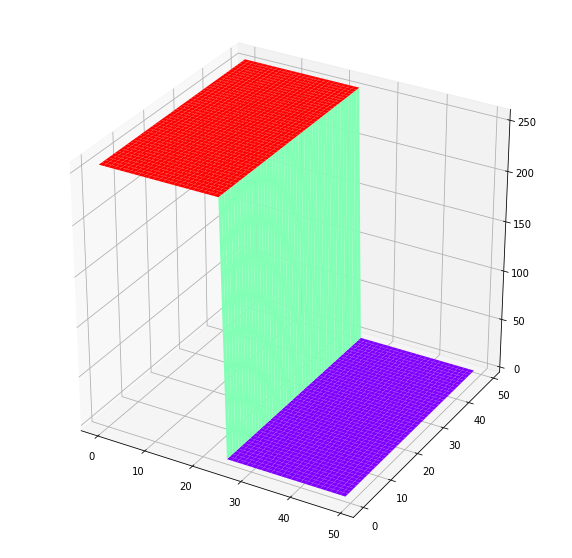

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

image=np.ones((50,50))*255
image[:,25:50]=0
fig = plt.figure(figsize=(10,10))
ax3 = plt.axes(projection='3d')
#定义三维数据
xx = np.arange(0,50,1)
yy = np.arange(0,50,1)
X, Y = np.meshgrid(xx, yy)
ax3.plot_surface(X,Y,image,cmap='rainbow')
plt.show()

然后，我们选取接近边缘的点$(25,23)$来计算它的双边滤波权重，这个滤波器的范围我们设定为45，然后$\delta_s=10$,$\delta_r=10$,这样我们可以计算出对应的$g_{\delta_s}$和$g_{\delta_r}$

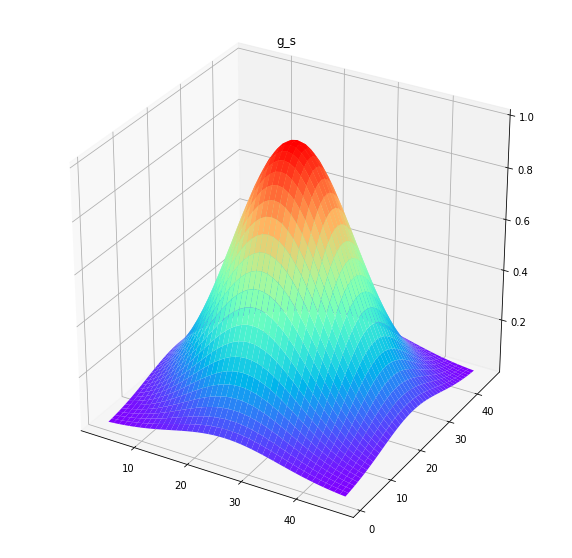

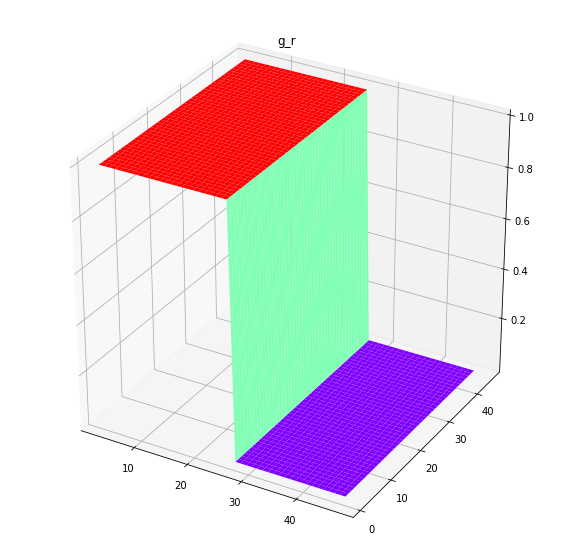

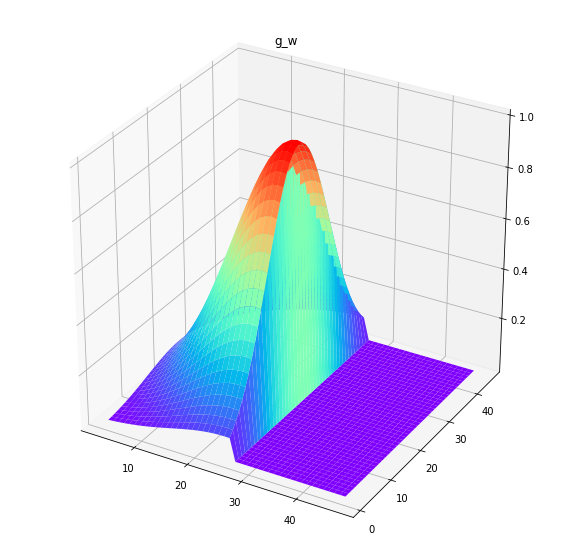

In [27]:
def guass(X,delta):
  num=-0.5*np.power((X/delta),2)
  return np.exp(num)

xx = np.arange(3,48,1)
yy = np.arange(1,46,1)
X, Y = np.meshgrid(xx, yy)
g_s=guass(np.sqrt(np.power(X-25,2)+np.power(Y-23,2)),10)
g_r=guass(np.abs(image[3:48,1:46]-image[25,23]),10)
fig_s = plt.figure(figsize=(10,10))
ax3 = plt.axes(projection='3d')
ax3.plot_surface(X,Y,g_s,cmap='rainbow')
plt.title('g_s')
plt.show()
fig_r = plt.figure(figsize=(10,10))
ax3 = plt.axes(projection='3d')
ax3.plot_surface(X,Y,g_r,cmap='rainbow')
plt.title('g_r')
plt.show()
fig_w = plt.figure(figsize=(10,10))
ax3 = plt.axes(projection='3d')
ax3.plot_surface(X,Y,g_r*g_s,cmap='rainbow')
plt.title('g_w')
plt.show()

通过上面的g_s,g_r,g_w图像，可以看到双边滤波在图像边缘的时候，只会使用与自己像素值接近的点来计算平均，而忽略边缘另一边像素值差距较大的点，这样就实现了平滑图像的同时，保留图像的边缘信息。